In [4]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_35544\919149335.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_35544\919149335.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_35544\919149335.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\User

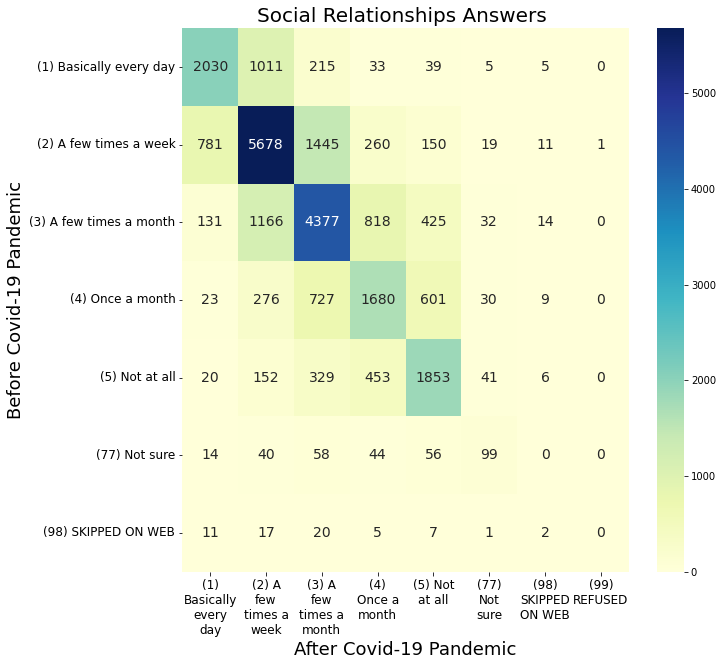

In [92]:
#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

SE1 = pd.crosstab(df['SOC2B'],
                  df['SOC2A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True,fmt='g',annot_kws={"size": 14},cmap="YlGnBu")
# s.set(xlabel='Social Relationships (After Covid Pandemic)', ylabel='Social Relationships (Before Covid Pandemic')
s.axes.set_title("Social Relationships Answers ",fontsize=20)
s.set_xlabel("After Covid-19 Pandemic",fontsize=18)
s.set_ylabel("Before Covid-19 Pandemic",fontsize=18)
s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 12 , rotation=45)
s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12 )
wrap_labels(s, 7)
s.figure
# s.set_xyicklabels(s.get_jmajorticklabels(), fontsize = 14,rotation=45)
plt.savefig("C:\python\SE01-CROS.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

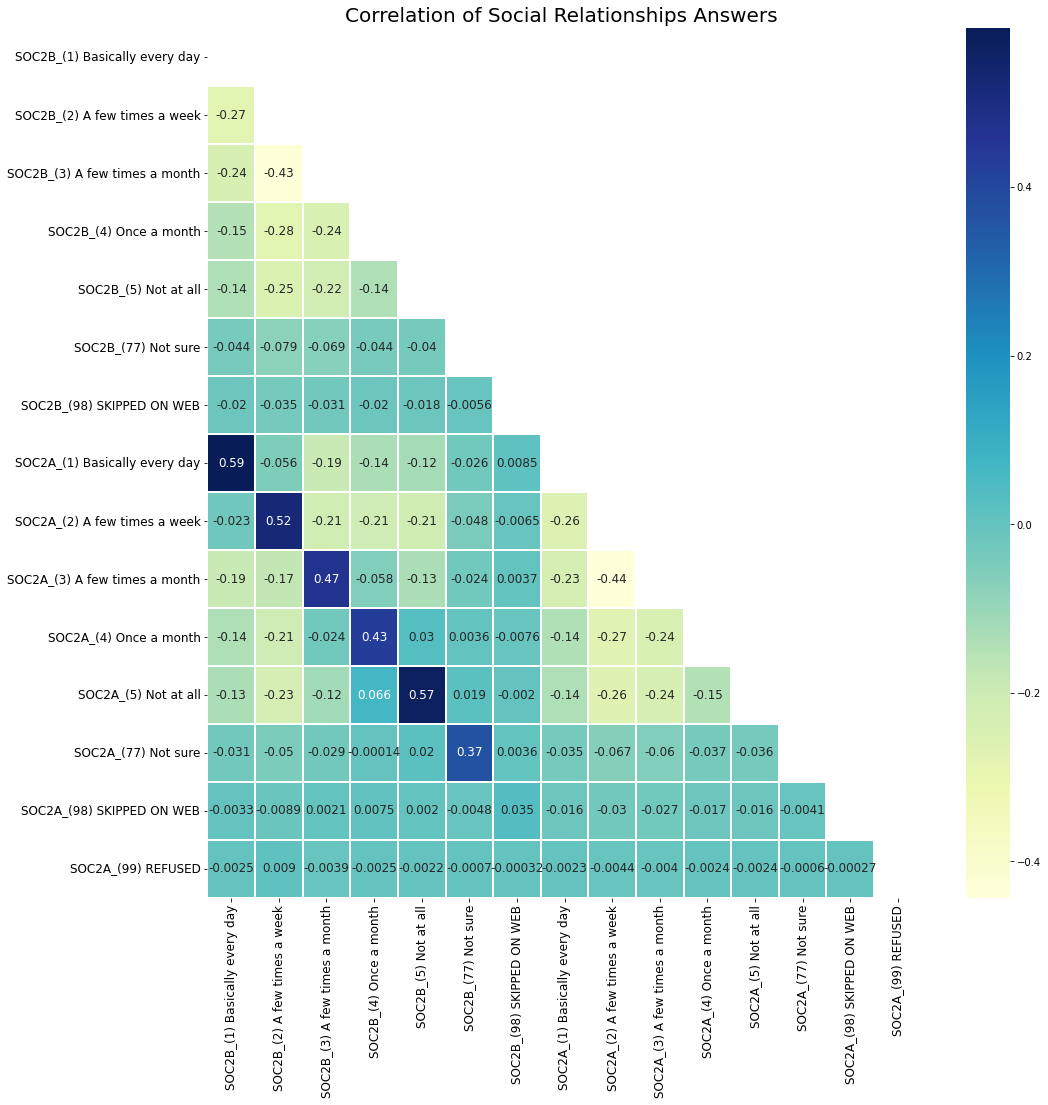

In [93]:
import numpy as np
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

SE1 = pd.get_dummies(df[['SOC2B','SOC2A']])
plt.figure(figsize=(16,16))

SE1_CORR = SE1.corr()
matrix = np.triu(SE1_CORR)
s=sns.heatmap(SE1_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix,annot_kws={"size": 12})
s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 12 , rotation=90)
s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12)
s.axes.set_title("Correlation of Social Relationships Answers ",fontsize=20)
# wrap_labels(s, 4)
# plt.yticks(rotation=0);
plt.savefig("C:\python\SE01-CORS.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

NameError: name 'textwrap' is not defined

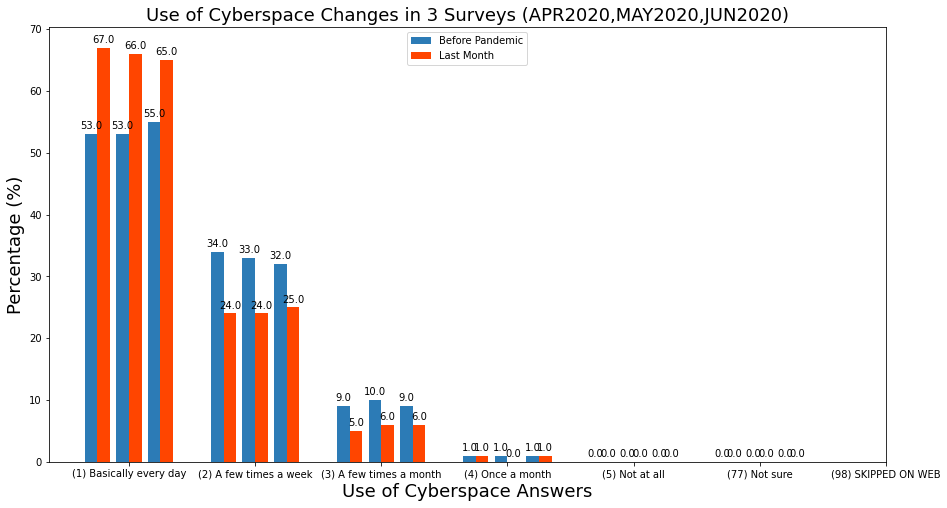

In [3]:
se1_1=df1[['SOC2B','SOC2A']]

se1_apr = df1[['SOC2B','SOC2A']]

data1B=se1_1['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC2B','SOC2A']]
data2B=se1_2['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC2B','SOC2A']]
data3B=se1_3['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

plotdata = pd.DataFrame({
 "APR_BEFORE_PANDEMIC":data1['april_before'].values,
    "APR_LAST_MONTH":data1['april_after'].values,
    "MAY_BEFORE_PANDEMIC":data1['may_before'].values,
    "MAY_LAST_MONTH":data1['may_after'].values,
    "JUN_BEFORE_PANDEMIC":data1['june_before'].values,
    "JUN_LAST_MONTH":data1['june_after'].values
    },
    index=data1['unique_values']
)
color_dict = {'APR_BEFORE_PANDEMIC':'#90EE90',
              'APR_LAST_MONTH':'#228B22',
              'MAY_BEFORE_PANDEMIC': '#00CED1',
              'MAY_LAST_MONTH': '#1E90FF',
              'JUN_BEFORE_PANDEMIC': '#FFB6C1',
              'JUN_LAST_MONTH': '#FF1493',
              }
plotdata.plot(kind="bar",figsize=(10,10) , color = color_dict)
plt.title("Social Activity Changes")
plt.xticks(fontsize=7 , rotation=45)


plt.xlabel("Social Activity")
plt.ylabel("Percentage (%)")
# for i, plotdata in enumerate(plotdata):
#     ax.text(plotdata + 3, i, str(plotdata))
# xmin, xmax = ax.get_xlim()
# ax.set_xlim(xmin, 1.1*xmax)

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
plt.xticks(xlocs, xlabs)

# plt.savefig(SE03.png)
plt.savefig("C:\python\SE01-BAR.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [36]:
se1_1=df1[['SOC2B','SOC2A']]


data1B=se1_1['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC2B','SOC2A']]
data2B=se1_2['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC2B','SOC2A']]
data3B=se1_3['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)
data1

,unique_values,april_before,april_after,may_before,may_after,june_before,june_after
0,(1) Basically every day,13,10,13,11,13,13
1,(2) A few times a week,32,31,33,33,33,34
2,(3) A few times a month,28,28,27,28,26,27
3,(4) Once a month,13,14,13,12,12,12
4,(5) Not at all,11,13,11,12,11,11
5,(77) Not sure,1,0,1,0,1,0
6,(98) SKIPPED ON WEB,0,0,0,0,0,0


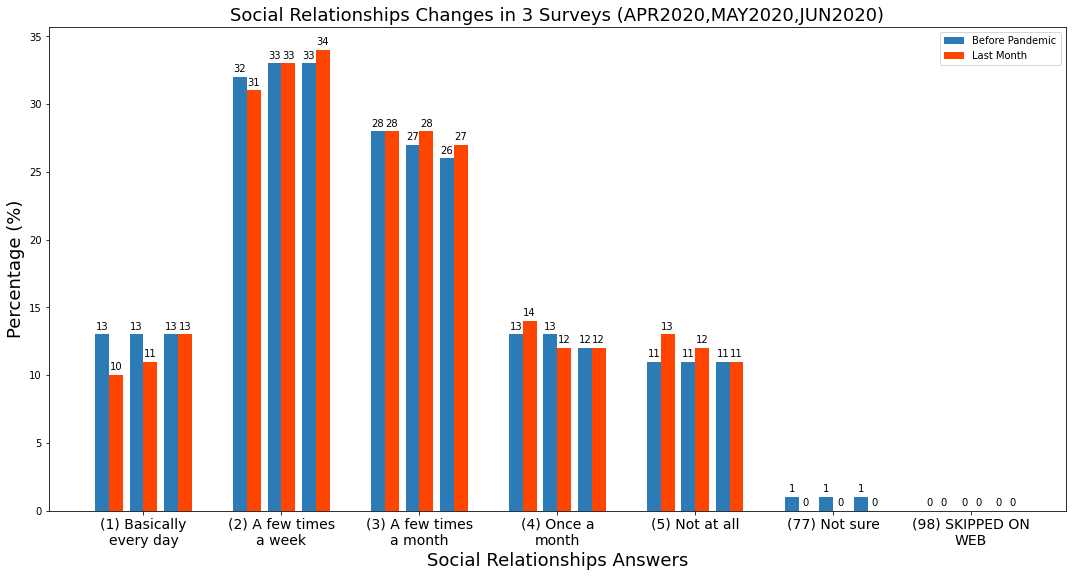

In [98]:
import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2 = ax.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3 = ax.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4 = ax.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects5 = ax.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects6 = ax.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)',fontsize=18)
ax.set_xlabel('Social Relationships Answers',fontsize=18)
ax.set_title('Social Relationships Changes in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
wrap_labels(ax, 15)

fig.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
plt.show()

fig.savefig('C:\python\SE01-BARS.png',format='png', dpi=600)

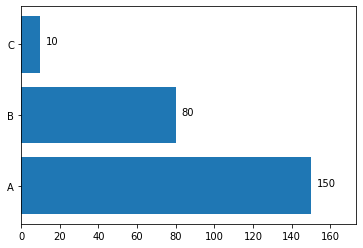

In [7]:
labels = ['A', 'B', 'C']
values = [150, 80, 10]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.show()

In [34]:
data2 = data1.iloc[: , 1:]
data2= data2.astype(float).astype(int)
data2

,april_before,april_after,may_before,may_after,june_before,june_after
0,13,10,13,11,13,13
1,32,31,33,33,33,34
2,28,28,27,28,26,27
3,13,14,13,12,12,12
4,11,13,11,12,11,11
5,1,0,1,0,1,0
6,0,0,0,0,0,0


In [8]:
SE1 = pd.crosstab(df['SOC2B'],
                  df['SOC2A'],
                 margins = False)


filepath = Path('C:\python\se1_heatmap.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
SE1.to_csv(filepath)

SE1

SOC2A,(1) Basically every day,(2) A few times a week,(3) A few times a month,(4) Once a month,(5) Not at all,(77) Not sure,(98) SKIPPED ON WEB,(99) REFUSED
SOC2B,,,,,,,,
(1) Basically every day,2030,1011,215,33,39,5,5,0
(2) A few times a week,781,5678,1445,260,150,19,11,1
(3) A few times a month,131,1166,4377,818,425,32,14,0
(4) Once a month,23,276,727,1680,601,30,9,0
(5) Not at all,20,152,329,453,1853,41,6,0
(77) Not sure,14,40,58,44,56,99,0,0
(98) SKIPPED ON WEB,11,17,20,5,7,1,2,0
